#### Replication of Earnings Streak Paper

##### Load packages and such

In [4]:
import os
from datetime import date
from functools import partial
from pathlib import Path
import sys
from dotenv import load_dotenv
import os

load_dotenv()

sys.path.append(os.getenv("ROOT"))

In [5]:
import pandas as pd
import numpy as np
import polars as pl

import silverfund.data_access_layer as dal
from silverfund.enums import Interval



##### Merges

In [6]:
epsData=pl.read_csv(r'/home/porter77/earnings-streak/sf-trading-system/research/example/streaks/usa-eps-92to25.csv')
print(epsData['anndats'].describe())
# epsData=epsData.filter(pl.col('USFIRM')==1)
epsData.sort(['OFTIC','anndats'])

shape: (4, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ str        │
╞════════════╪════════════╡
│ count      ┆ 680486     │
│ null_count ┆ 0          │
│ min        ┆ 1992-04-21 │
│ max        ┆ 2025-02-20 │
└────────────┴────────────┘


TICKER,OFTIC,MEASURE,FISCALP,PYEAR,PMON,USFIRM,anndats,actual,surpmean,surpstdev,suescore
str,str,str,str,i64,i64,i64,str,f64,f64,f64,f64
"""CRAW/1""",null,"""EPS""","""QTR""",2001,12,1,"""2002-01-31""",null,0.13,null,null
"""CRAW/1""",null,"""EPS""","""QTR""",2002,3,1,"""2002-04-25""",0.17,0.17,null,null
"""CRAW/1""",null,"""EPS""","""QTR""",2002,6,1,"""2002-07-22""",0.1,0.13,null,null
"""RIGX""",null,"""EPS""","""ANN""",2016,12,1,"""2017-02-22""",0.426,0.42267,0.00122,2.72175
"""RIGX""",null,"""EPS""","""QTR""",2016,12,1,"""2017-02-22""",0.129,0.12589,0.00105,2.95144
…,…,…,…,…,…,…,…,…,…,…,…
"""SELY""","""ZZ""","""EPS""","""QTR""",2012,2,1,"""2012-03-27""",0.02,-0.02143,0.0241,1.71881
"""SELY""","""ZZ""","""EPS""","""QTR""",2012,5,1,"""2012-06-26""",0.03,-0.00143,0.01574,1.99724
"""SELY""","""ZZ""","""EPS""","""QTR""",2012,8,1,"""2012-09-27""",0.0,0.0325,0.00886,-3.66652


In [7]:
from datetime import datetime

start_date = datetime.strptime("2016-01-01", "%Y-%m-%d").date()

crspData=dal.load_crsp(interval=Interval.DAILY,start_date=start_date)
crspData

Loading CRSP Daily:   0%|          | 0/10 [00:00<?, ?it/s]

Loading CRSP Daily: 100%|██████████| 10/10 [00:01<00:00,  9.78it/s]


permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr
i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64
10001,7953,2016-01-04,"""36720410""","""EGAS""",11,2,4925,7.52,0.009396,0.009396,15816.0,10505.0,1.0
10001,7953,2016-01-05,"""36720410""","""EGAS""",11,2,4925,7.42,-0.013298,-0.013298,22037.0,10505.0,1.0
10001,7953,2016-01-06,"""36720410""","""EGAS""",11,2,4925,7.53,0.014825,0.014825,11532.0,10505.0,1.0
10001,7953,2016-01-07,"""36720410""","""EGAS""",11,2,4925,7.64,0.014608,0.014608,17172.0,10505.0,1.0
10001,7953,2016-01-08,"""36720410""","""EGAS""",11,2,4925,7.79,0.019634,0.019634,9622.0,10505.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
93436,53453,2024-12-24,"""88160R10""","""TSLA""",11,3,9999,462.28,0.073572,0.073572,5.9351506e7,3.21006e6,1.0
93436,53453,2024-12-26,"""88160R10""","""TSLA""",11,3,9999,454.13,-0.01763,-0.01763,7.6392273e7,3.21006e6,1.0
93436,53453,2024-12-27,"""88160R10""","""TSLA""",11,3,9999,431.66,-0.049479,-0.049479,8.2370345e7,3.21006e6,1.0


In [8]:
mapping=pl.read_csv('ibes_to_cusip.csv')
mapping = mapping.rename({"CUSIP": "ncusip"})
mapping




TICKER,ncusip,OFTIC,CNAME,EXCHCD,COUNTRY,SDATES
str,str,str,str,str,str,str
"""0000""","""87482X10""","""TLMR""","""TALMER BANCORP INC""","""F""","""NA""","""2014-02-20"""
"""0000""","""87482X10""","""TLMR""","""TALMER BANCORP INC""","""F""","""NA""","""2014-03-20"""
"""0001""","""26878510""","""EPE""","""EP ENERGY CORP""","""A""","""NA""","""2014-02-20"""
"""0001""","""26878510""","""EPE""","""EP ENERGY CORP""","""A""","""NA""","""2014-03-20"""
"""0001""","""26878510""","""EPEG""","""EP ENERGY CORP""","""A""","""NA""","""2019-06-20"""
…,…,…,…,…,…,…
"""ZY""","""87254010""","""TJX""","""TJX COMPANIES INC""","""A""","""NA""","""2015-03-19"""
"""ZYNE""","""98986X10""","""ZYNE""","""ZYNERBA PHARMACEUTICALS INC""","""F""","""NA""","""2015-09-17"""
"""ZYNX""","""98986510""","""ZYNX""","""ZYNEX MEDICAL HOLDINGS INC""","""U""","""NA""","""2005-07-14"""


In [9]:
cusipEps=epsData.join(mapping,on=['TICKER','OFTIC'])

cusipEps = cusipEps.with_columns(
    pl.col("anndats").str.strptime(pl.Date, format="%Y-%m-%d").alias("date")
)



In [10]:
totalMerge=cusipEps.join(crspData,on=['date','ncusip'],how='right')
totalMerge=totalMerge.rename({'surpmean':'expected','FISCALP':'fiscalp','USFIRM':'usfirm','PMON':'periodmonth','PYEAR':'periodyear'})
#'actual EPS':'actual','surpmean (expected)':'expected',

totalMerge

TICKER,OFTIC,MEASURE,fiscalp,periodyear,periodmonth,usfirm,anndats,actual,expected,surpstdev,suescore,CNAME,EXCHCD,COUNTRY,SDATES,permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr
str,str,str,str,i64,i64,i64,str,f64,f64,f64,f64,str,str,str,str,i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10001,7953,2016-01-04,"""36720410""","""EGAS""",11,2,4925,7.52,0.009396,0.009396,15816.0,10505.0,1.0
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10001,7953,2016-01-05,"""36720410""","""EGAS""",11,2,4925,7.42,-0.013298,-0.013298,22037.0,10505.0,1.0
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10001,7953,2016-01-06,"""36720410""","""EGAS""",11,2,4925,7.53,0.014825,0.014825,11532.0,10505.0,1.0
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10001,7953,2016-01-07,"""36720410""","""EGAS""",11,2,4925,7.64,0.014608,0.014608,17172.0,10505.0,1.0
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10001,7953,2016-01-08,"""36720410""","""EGAS""",11,2,4925,7.79,0.019634,0.019634,9622.0,10505.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,93436,53453,2024-12-24,"""88160R10""","""TSLA""",11,3,9999,462.28,0.073572,0.073572,5.9351506e7,3.21006e6,1.0
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,93436,53453,2024-12-26,"""88160R10""","""TSLA""",11,3,9999,454.13,-0.01763,-0.01763,7.6392273e7,3.21006e6,1.0
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,93436,53453,2024-12-27,"""88160R10""","""TSLA""",11,3,9999,431.66,-0.049479,-0.049479,8.2370345e7,3.21006e6,1.0


In [11]:

totalMerge = totalMerge.select([
    'actual',
    'expected',
    'fiscalp',
    'surpstdev',
    'suescore',
    'permno',
    'permco',
    'date',
    'ncusip',
    'ticker',
    'shrcd',
    'exchcd',
    'siccd',
    'prc',
    'ret',
    'retx',
    'vol',
    'shrout',
    'cfacshr',
    'periodmonth',
    'periodyear'
])
totalMerge=totalMerge.unique()

### Forming Porfolios

##### Make the signal (DAILY)

In [12]:
#filter out low prices

totalMerge=totalMerge.filter(
    (pl.col('prc')>=5) & ((pl.col('fiscalp')=='QTR') |(pl.col('fiscalp').is_null()) )#only keep quarterly earnings bc some companies do both annual and quarter on the same day
)



In [13]:
totalMerge = totalMerge.sort(['ncusip', 'date'])
totalMerge


actual,expected,fiscalp,surpstdev,suescore,permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr,periodmonth,periodyear
f64,f64,str,f64,f64,i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64
null,null,null,null,null,14945,55038,2016-01-04,"""00030710""","""AAC""",11,1,6799,18.52,-0.028332,-0.028332,119601.0,22407.0,1.0,null,null
null,null,null,null,null,14945,55038,2016-01-05,"""00030710""","""AAC""",11,1,6799,19.46,0.050756,0.050756,104795.0,22407.0,1.0,null,null
null,null,null,null,null,14945,55038,2016-01-06,"""00030710""","""AAC""",11,1,6799,19.01,-0.023124,-0.023124,126818.0,22407.0,1.0,null,null
null,null,null,null,null,14945,55038,2016-01-07,"""00030710""","""AAC""",11,1,6799,18.2,-0.042609,-0.042609,98535.0,22407.0,1.0,null,null
null,null,null,null,null,14945,55038,2016-01-08,"""00030710""","""AAC""",11,1,6799,18.11,-0.004945,-0.004945,227058.0,22407.0,1.0,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,null,15857,55491,2024-12-24,"""Y9530810""","""WVE""",12,3,9999,13.41,0.022104,0.022104,350434.0,152143.0,1.0,null,null
null,null,null,null,null,15857,55491,2024-12-26,"""Y9530810""","""WVE""",12,3,9999,13.48,0.00522,0.00522,418580.0,152143.0,1.0,null,null
null,null,null,null,null,15857,55491,2024-12-27,"""Y9530810""","""WVE""",12,3,9999,12.9,-0.043027,-0.043027,590166.0,152143.0,1.0,null,null


In [14]:

totalMerge=totalMerge.with_columns((pl.col('actual')-pl.col('expected')).alias('surprise'))


totalMerge = totalMerge.with_columns(
    (
        (pl.col("surprise") / pl.col("prc"))  # use previous day's price
        .alias("raw_surpsignal")
    )
)

#i dont think i need to use previous days price if i shift the whole thing forward at the end

totalMerge = totalMerge.with_columns(
    pl.col("raw_surpsignal").shift(1).over("ncusip").alias("surpsignal")
)

totalMerge


actual,expected,fiscalp,surpstdev,suescore,permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr,periodmonth,periodyear,surprise,raw_surpsignal,surpsignal
f64,f64,str,f64,f64,i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64
null,null,null,null,null,14945,55038,2016-01-04,"""00030710""","""AAC""",11,1,6799,18.52,-0.028332,-0.028332,119601.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-05,"""00030710""","""AAC""",11,1,6799,19.46,0.050756,0.050756,104795.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-06,"""00030710""","""AAC""",11,1,6799,19.01,-0.023124,-0.023124,126818.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-07,"""00030710""","""AAC""",11,1,6799,18.2,-0.042609,-0.042609,98535.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-08,"""00030710""","""AAC""",11,1,6799,18.11,-0.004945,-0.004945,227058.0,22407.0,1.0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,null,15857,55491,2024-12-24,"""Y9530810""","""WVE""",12,3,9999,13.41,0.022104,0.022104,350434.0,152143.0,1.0,null,null,null,null,null
null,null,null,null,null,15857,55491,2024-12-26,"""Y9530810""","""WVE""",12,3,9999,13.48,0.00522,0.00522,418580.0,152143.0,1.0,null,null,null,null,null
null,null,null,null,null,15857,55491,2024-12-27,"""Y9530810""","""WVE""",12,3,9999,12.9,-0.043027,-0.043027,590166.0,152143.0,1.0,null,null,null,null,null


In [15]:
# Step 1: Create the filtered flag
totalMerge = totalMerge.with_columns(
    ((pl.col("surprise").is_not_null()) & (pl.col("surpsignal").is_not_null()))
    .alias("is_match")
)

# Step 2: Shift the flag *backwards* to capture the previous row
totalMerge = totalMerge.with_columns(
    pl.col("is_match").shift(-1).over("ncusip").alias("next_row_is_match")
)

# Step 3: Keep rows where current OR next row is a match
filtered_with_prev = totalMerge.filter(
    pl.col("is_match") | pl.col("next_row_is_match")
).sort(["ncusip", "date"])

filtered_with_prev.sort('date')

actual,expected,fiscalp,surpstdev,suescore,permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr,periodmonth,periodyear,surprise,raw_surpsignal,surpsignal,is_match,next_row_is_match
f64,f64,str,f64,f64,i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,bool,bool
0.6,0.5475,"""QTR""",0.03888,1.35045,10180,9743,2016-05-10,"""00972810""","""AKRX""",11,3,2834,27.29,0.200616,0.200616,5.292872e6,119427.0,1.0,12,2015,0.0525,0.001924,null,false,true
0.41,0.46714,"""QTR""",0.02585,-2.21073,10180,9743,2016-05-10,"""00972810""","""AKRX""",11,3,2834,27.29,0.200616,0.200616,5.292872e6,119427.0,1.0,6,2015,-0.05714,-0.002094,0.001924,true,true
0.56,0.49615,"""QTR""",0.02399,2.66103,10180,9743,2016-05-10,"""00972810""","""AKRX""",11,3,2834,27.29,0.200616,0.200616,5.292872e6,119427.0,1.0,9,2015,0.06385,0.00234,-0.002094,true,true
0.45,0.42786,"""QTR""",0.02636,0.83989,10180,9743,2016-05-10,"""00972810""","""AKRX""",11,3,2834,27.29,0.200616,0.200616,5.292872e6,119427.0,1.0,3,2015,0.02214,0.000811,0.00234,true,false
0.2,0.155,"""QTR""",0.04655,0.96676,14759,54929,2016-05-31,"""00790R10""","""WMS""",11,1,3084,24.31,-0.01219,-0.01219,742915.0,54237.0,1.0,12,2015,0.045,0.001851,null,false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-0.63,-1.3,"""QTR""",1.28497,0.52141,25142,59889,2024-08-06,"""88023B10""","""TEM""",11,3,9999,40.65,0.063579,0.063579,982433.0,149275.0,1.0,6,2024,0.67,0.016482,-0.019926,true,false
-0.15,-0.126,"""QTR""",0.10621,-0.22597,17315,56267,2024-08-07,"""14161W10""","""CDLX""",11,3,9999,6.9,-0.057377,-0.057377,2.036697e6,49840.0,1.0,6,2024,-0.024,-0.003478,null,false,true
0.52,0.52,"""QTR""",null,null,25046,59868,2024-08-13,"""48662X10""","""KBDC""",14,1,7389,15.93,0.004414,0.004414,42767.0,71116.0,1.0,3,2024,0.0,0.0,null,false,true


In [16]:
totalMerge=totalMerge.filter(
    (pl.col('is_match')==False) &(pl.col('next_row_is_match')==False)
    
)
totalMerge=totalMerge.drop(['is_match','next_row_is_match'])
#getting around the fact that some firms announce multiple quarters on the same day
totalMerge

actual,expected,fiscalp,surpstdev,suescore,permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr,periodmonth,periodyear,surprise,raw_surpsignal,surpsignal
f64,f64,str,f64,f64,i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64
null,null,null,null,null,14945,55038,2016-01-04,"""00030710""","""AAC""",11,1,6799,18.52,-0.028332,-0.028332,119601.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-05,"""00030710""","""AAC""",11,1,6799,19.46,0.050756,0.050756,104795.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-06,"""00030710""","""AAC""",11,1,6799,19.01,-0.023124,-0.023124,126818.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-07,"""00030710""","""AAC""",11,1,6799,18.2,-0.042609,-0.042609,98535.0,22407.0,1.0,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-08,"""00030710""","""AAC""",11,1,6799,18.11,-0.004945,-0.004945,227058.0,22407.0,1.0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,null,15857,55491,2024-12-23,"""Y9530810""","""WVE""",12,3,9999,13.12,-0.028868,-0.028868,852517.0,152143.0,1.0,null,null,null,null,null
null,null,null,null,null,15857,55491,2024-12-24,"""Y9530810""","""WVE""",12,3,9999,13.41,0.022104,0.022104,350434.0,152143.0,1.0,null,null,null,null,null
null,null,null,null,null,15857,55491,2024-12-26,"""Y9530810""","""WVE""",12,3,9999,13.48,0.00522,0.00522,418580.0,152143.0,1.0,null,null,null,null,null


In [17]:

totalMerge = totalMerge.with_columns(
    pl.when(pl.col("surpsignal") > 0)
      .then(1)
      .when(pl.col("surpsignal") <= 0)
      .then(-1)
      .alias("sign")
)


print(totalMerge['sign'].describe())


shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ value       │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 115594.0    │
│ null_count ┆ 1.5101097e7 │
│ mean       ┆ 0.307127    │
│ std        ┆ 0.951673    │
│ min        ┆ -1.0        │
│ 25%        ┆ -1.0        │
│ 50%        ┆ 1.0         │
│ 75%        ┆ 1.0         │
│ max        ┆ 1.0         │
└────────────┴─────────────┘


In [18]:
subset = totalMerge.filter(pl.col("sign").is_not_null())
subset.sort(['ncusip','date'])
subset = subset.with_columns(
    pl.col('sign').shift(1).over('ncusip').alias('prev_sign')
)

subset=subset.with_columns(
    pl.when((pl.col('sign')==1)& (pl.col('prev_sign')==1))
    .then(1)
    .when((pl.col('sign')==-1)& (pl.col('prev_sign')==-1))
    .then(-1)
    .otherwise(0)
    .alias('streak')
)
subset

mergeStreaks=subset.select(['ncusip','date','streak'])
mergeStreaks


ncusip,date,streak
str,date,i32
"""00030710""",2016-02-24,0
"""00030710""",2016-05-06,0
"""00030710""",2016-08-05,0
"""00030710""",2016-11-04,-1
"""00030710""",2017-02-28,-1
…,…,…
"""Y9530810""",2023-11-10,1
"""Y9530810""",2024-03-07,1
"""Y9530810""",2024-05-10,0


In [19]:
totalMerge=totalMerge.join(mergeStreaks,on=['ncusip','date'],how='left')


In [20]:
totalMerge['streak'].describe()

statistic,value
str,f64
"""count""",115602.0
"""null_count""",1.5101089e7
"""mean""",0.300964
"""std""",0.724225
"""min""",-1.0
"""25%""",0.0
"""50%""",0.0
"""75%""",1.0
"""max""",1.0


In [21]:
totalMerge = totalMerge.sort(['ncusip', 'date'])
totalMerge


actual,expected,fiscalp,surpstdev,suescore,permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr,periodmonth,periodyear,surprise,raw_surpsignal,surpsignal,sign,streak
f64,f64,str,f64,f64,i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,i32,i32
null,null,null,null,null,14945,55038,2016-01-04,"""00030710""","""AAC""",11,1,6799,18.52,-0.028332,-0.028332,119601.0,22407.0,1.0,null,null,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-05,"""00030710""","""AAC""",11,1,6799,19.46,0.050756,0.050756,104795.0,22407.0,1.0,null,null,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-06,"""00030710""","""AAC""",11,1,6799,19.01,-0.023124,-0.023124,126818.0,22407.0,1.0,null,null,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-07,"""00030710""","""AAC""",11,1,6799,18.2,-0.042609,-0.042609,98535.0,22407.0,1.0,null,null,null,null,null,null,null
null,null,null,null,null,14945,55038,2016-01-08,"""00030710""","""AAC""",11,1,6799,18.11,-0.004945,-0.004945,227058.0,22407.0,1.0,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,null,15857,55491,2024-12-23,"""Y9530810""","""WVE""",12,3,9999,13.12,-0.028868,-0.028868,852517.0,152143.0,1.0,null,null,null,null,null,null,null
null,null,null,null,null,15857,55491,2024-12-24,"""Y9530810""","""WVE""",12,3,9999,13.41,0.022104,0.022104,350434.0,152143.0,1.0,null,null,null,null,null,null,null
null,null,null,null,null,15857,55491,2024-12-26,"""Y9530810""","""WVE""",12,3,9999,13.48,0.00522,0.00522,418580.0,152143.0,1.0,null,null,null,null,null,null,null


In [22]:
from datetime import timedelta
from tqdm import tqdm

# Unique sorted dates
keys = totalMerge['date'].unique().to_list()
keys = sorted(keys)

# Dict to hold long positions by date
long_holdings_by_date = {k: [] for k in keys}

# Loop with progress bar
for date in tqdm(keys, desc="Building long holdings"):
    sub = totalMerge.filter((pl.col('date') == date) & (pl.col('streak') == 1))
    
    for i in range(127):
        day = date + timedelta(days=i)
        if day in long_holdings_by_date:
            ret_df = sub.select(['ncusip', 'ret'])
            long_holdings_by_date[day].extend(ret_df.to_dicts())



Building long holdings: 100%|██████████| 2263/2263 [01:05<00:00, 34.34it/s]


In [23]:
from datetime import timedelta
from tqdm import tqdm

# Unique sorted dates
keys = totalMerge['date'].unique().to_list()
keys = sorted(keys)

# Dict to hold long positions by date
short_holdings_by_date = {k: [] for k in keys}

# Loop with progress bar
for date in tqdm(keys, desc="Building short holdings"):
    sub = totalMerge.filter((pl.col('date') == date) & (pl.col('streak') == -1))
    
    for i in range(127):
        day = date + timedelta(days=i)
        if day in short_holdings_by_date:
            ret_df = sub.select(['ncusip', 'ret'])
            short_holdings_by_date[day].extend(ret_df.to_dicts())

Building short holdings: 100%|██████████| 2263/2263 [00:48<00:00, 47.04it/s]


In [24]:
from statistics import mean

long_mean_returns_by_date = {}

for date, holdings in long_holdings_by_date.items():
    # Dictionary to store the most recent return for each ncusip (or just first one)
    ret_by_ncusip = {}
    for entry in holdings:
        ncusip = entry["ncusip"]
        ret = entry["ret"]
        if ret is not None:
            ret_by_ncusip[ncusip] = ret  # overwrite or keep only one value per ncusip

    if ret_by_ncusip:
        long_mean_returns_by_date[date] = mean(ret_by_ncusip.values())
    else:
        long_mean_returns_by_date[date] = None  # or 0.0 if you prefer


In [25]:
from statistics import mean

short_mean_returns_by_date = {}

for date, holdings in short_holdings_by_date.items():
    # Dictionary to store the most recent return for each ncusip (or just first one)
    ret_by_ncusip = {}
    for entry in holdings:
        ncusip = entry["ncusip"]
        ret = entry["ret"]
        if ret is not None:
            ret_by_ncusip[ncusip] = ret  # overwrite or keep only one value per ncusip

    if ret_by_ncusip:
        short_mean_returns_by_date[date] = mean(ret_by_ncusip.values())
    else:
        short_mean_returns_by_date[date] = None  # or 0.0 if you prefer


In [26]:
short_n_holdings_by_date = {
    date: len(set(entry["ncusip"] for entry in holdings))
    for date, holdings in short_holdings_by_date.items()
}

import polars as pl

short = pl.DataFrame({
    "date": list(short_n_holdings_by_date.keys()),
    "n_short_holdings": list(short_n_holdings_by_date.values())
}).sort("date")


long_n_holdings_by_date = {
    date: len(set(entry["ncusip"] for entry in holdings))
    for date, holdings in long_holdings_by_date.items()
}

import polars as pl

long = pl.DataFrame({
    "date": list(long_n_holdings_by_date.keys()),
    "n_long_holdings": list(long_n_holdings_by_date.values())
}).sort("date")

total=long.join(short,on='date')
total=total.with_columns(
    (pl.col('n_long_holdings')+pl.col('n_short_holdings'))
    .alias('total_holdings')
)
total

date,n_long_holdings,n_short_holdings,total_holdings
date,i64,i64,i64
2016-01-04,0,0,0
2016-01-05,0,0,0
2016-01-06,0,0,0
2016-01-07,0,0,0
2016-01-08,0,0,0
…,…,…,…
2024-12-23,1532,535,2067
2024-12-24,1533,536,2069
2024-12-26,1531,536,2067


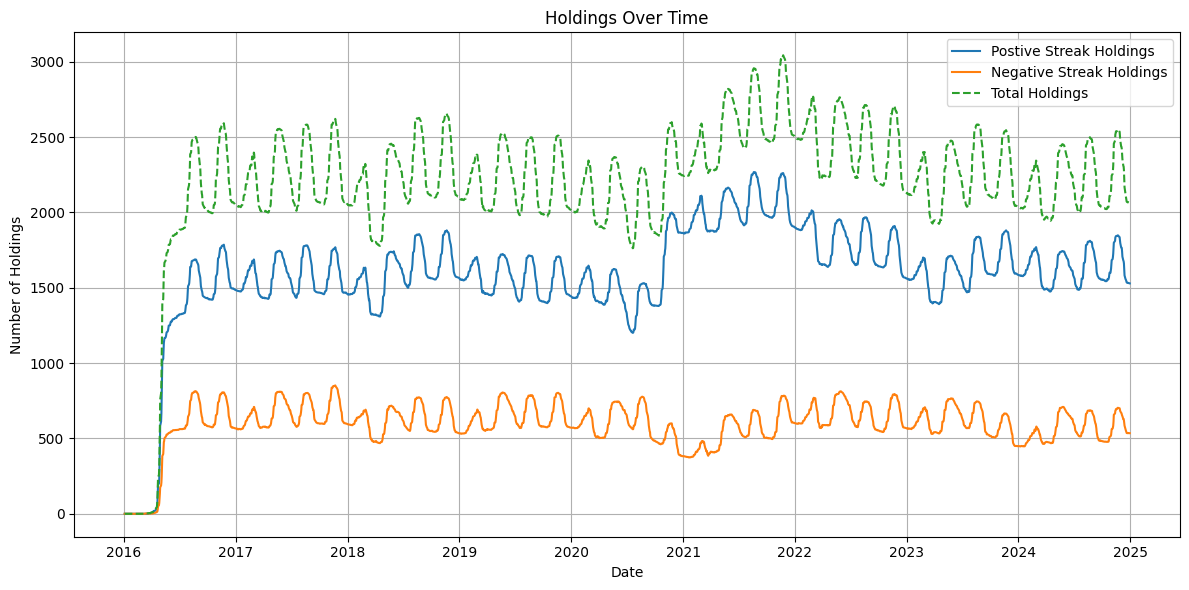

In [27]:
import matplotlib.pyplot as plt

# If your DataFrame is Polars:
df_pd = total.to_pandas()

plt.figure(figsize=(12, 6))

plt.plot(df_pd["date"], df_pd["n_long_holdings"], label="Postive Streak Holdings")
plt.plot(df_pd["date"], df_pd["n_short_holdings"], label="Negative Streak Holdings")
plt.plot(df_pd["date"], df_pd["total_holdings"], label="Total Holdings", linestyle="--")

plt.title("Holdings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Holdings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [28]:
for key in keys:
    print(long_mean_returns_by_date[key])

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.104187
0.104187
0.104187
0.064011
0.064011
0.048071666666666665
0.048071666666666665
0.01789725
0.022539166666666666
0.022539166666666666
0.002106
0.002106
0.002106
0.0019955999999999997
-0.008309
-0.010276105263157895
-0.010276105263157895
-0.011097
-0.0063592272727272725
-0.005519826086956522
-0.004946714285714286
-0.004871
-0.008173468085106383
0.0023957887323943663
0.0009312338709677421
0.005226240837696335
0.00486170792079208
0.006349774891774892
0.007418402476780186
0.0038186278538812784
0.003170361301369863
0.0029449494290375204
0.004002153153153153
0.00463101948051948
0.004915112359550561
0.005346611439842209
0.005133007782101167
0.00577109383624655
0.005683838624338624
0.005644124347826087
0.0056796861063464835
0.00569025085

In [29]:
for key in keys:
    print(short_mean_returns_by_date[key])

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
-0.1602
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.041829000000000005
-0.03289166666666667
-0.028386250000000002
-0.0262982
-0.029153666666666668
-0.029153666666666668
-0.02347642857142857
-0.020541875
-0.017373444444444445
-0.011697416666666667
-0.011147923076923078
-0.009095117647058825
-0.014468103448275862
-0.008359102040816328
-0.007998526315789475
-0.006759847222222223
-0.00519
-0.011386766917293234
-0.007901565714285715
-0.008197212765957447
-0.00

In [30]:
import polars as pl

ret = pl.DataFrame({
    "date": keys,  # same keys used for both dictionaries
    "long_ret": [long_mean_returns_by_date.get(k) for k in keys],
    "short_ret": [short_mean_returns_by_date.get(k) for k in keys]
}).sort("date")

ret=ret.with_columns(((pl.col('long_ret'))-(pl.col('short_ret'))).alias('spread'))

In [31]:
ret

date,long_ret,short_ret,spread
date,f64,f64,f64
2016-01-04,null,null,null
2016-01-05,null,null,null
2016-01-06,null,null,null
2016-01-07,null,null,null
2016-01-08,null,null,null
…,…,…,…
2024-12-23,0.012924,-0.003631,0.016555
2024-12-24,0.012898,-0.003603,0.016501
2024-12-26,0.012909,-0.003603,0.016513


In [52]:
import polars as pl

monthly_ret = (
    ret
    .with_columns([
        pl.col("date").dt.truncate("1mo").alias("month")
    ])
    .with_columns([
        pl.col("long_ret").cum_sum().over("month").alias("long_monthly_ret"),
        pl.col("short_ret").cum_sum().over("month").alias("short_monthly_ret"),
        pl.col("spread").cum_sum().over("month").alias("spread_monthly_ret")
    ])
    .group_by("month")
    .agg([
        pl.last("date").alias("last_date_of_month"),
        pl.last("long_monthly_ret").alias("monthly_long_ret"),
        pl.last("short_monthly_ret").alias("monthly_short_ret"),
        pl.last("spread_monthly_ret").alias("monthly_spread_ret")
    ])
    .sort("month")
)


In [53]:

pl.Config.set_tbl_rows(10)  # show up to 100 rows

monthly_ret

month,last_date_of_month,monthly_long_ret,monthly_short_ret,monthly_spread_ret
date,date,f64,f64,f64
2016-01-01,2016-01-29,null,null,null
2016-02-01,2016-02-29,null,null,null
2016-03-01,2016-03-31,0.599702,-0.745806,1.017992
2016-04-01,2016-04-29,-0.027343,-0.426767,0.399424
2016-05-01,2016-05-31,0.115306,-0.137659,0.252965
…,…,…,…,…
2024-08-01,2024-08-30,0.124513,-0.339323,0.463836
2024-09-01,2024-09-30,0.167397,-0.310009,0.477406
2024-10-01,2024-10-31,0.197714,-0.322791,0.520505


In [34]:
daily_returns = ret.with_columns([
    pl.col("long_ret").fill_null(0).alias("long_ret_filled"),
    pl.col("short_ret").fill_null(0).alias("short_ret_filled"),
    pl.col("spread").fill_null(0).alias("spread_ret_filled")
])

daily_returns = daily_returns.with_columns([
    daily_returns["long_ret_filled"].cum_sum().alias("long_cumret"),
    daily_returns["short_ret_filled"].cum_sum().alias("short_cumret"),
    daily_returns["spread_ret_filled"].cum_sum().alias("spread_cumret")
])

daily_returns

date,long_ret,short_ret,spread,long_ret_filled,short_ret_filled,spread_ret_filled,long_cumret,short_cumret,spread_cumret
date,f64,f64,f64,f64,f64,f64,f64,f64,f64
2016-01-04,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-05,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-06,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-07,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-08,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…
2024-12-23,0.012924,-0.003631,0.016555,0.012924,-0.003631,0.016555,16.790763,-23.050039,39.513287
2024-12-24,0.012898,-0.003603,0.016501,0.012898,-0.003603,0.016501,16.803661,-23.053642,39.529788
2024-12-26,0.012909,-0.003603,0.016513,0.012909,-0.003603,0.016513,16.81657,-23.057246,39.5463


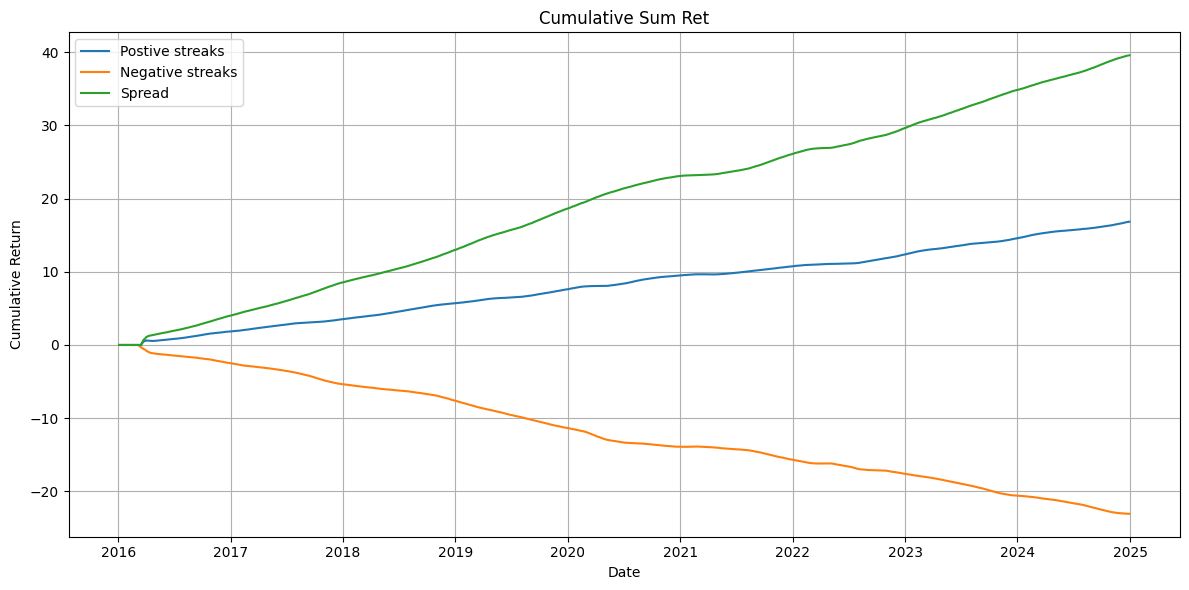

In [35]:
import matplotlib.pyplot as plt

df = daily_returns.to_pandas()

plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["long_cumret"], label="Postive streaks")
plt.plot(df["date"], df["short_cumret"], label="Negative streaks")
plt.plot(df["date"], df["spread_cumret"], label="Spread")
plt.title("Cumulative Sum Ret")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### 4 factor regression

In [36]:
factors=pl.read_csv(r'/home/porter77/earnings-streak/sf-trading-system/research/example/streaks/factors.csv')

#the factors are monthly but the returns are for the portfolios are daily


factors=factors.with_columns(
    pl.col("caldt").str.strptime(pl.Date, "%Y-%m-%d")
    .alias('date')
)

factors=factors.drop(pl.col('caldt'))

factormodel=ret.join(factors,on='date')
factormodel

date,long_ret,short_ret,spread,exmkt,smb,hml,umd,rf
date,f64,f64,f64,f64,f64,f64,f64,f64
2016-01-29,null,null,null,-5.77,-3.42,2.09,1.44,0.01
2016-02-29,null,null,null,-0.07,0.74,-0.57,-4.38,0.02
2016-03-31,0.022539,-0.041829,0.064368,6.96,0.82,1.19,-5.01,0.02
2016-04-29,0.00317,-0.007902,0.011072,0.91,0.76,3.28,-6.02,0.01
2016-05-31,0.006352,-0.005701,0.012053,1.78,-0.17,-1.66,1.43,0.01
…,…,…,…,…,…,…,…,…
2024-05-31,0.004637,-0.010446,0.015084,4.34,0.78,-1.67,-0.02,0.44
2024-06-28,0.004964,-0.01153,0.016494,2.77,-3.06,-3.31,0.9,0.41
2024-07-31,0.007978,-0.012073,0.020051,1.24,6.8,5.74,-2.42,0.45
